# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [3]:
data2 = data[['RetailSales','RetailTransfers','WarehouseSales']].groupby(data['ItemType']).sum()
data2.head(10)

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


Text(0.5, 1.0, 'Total by Item Type')

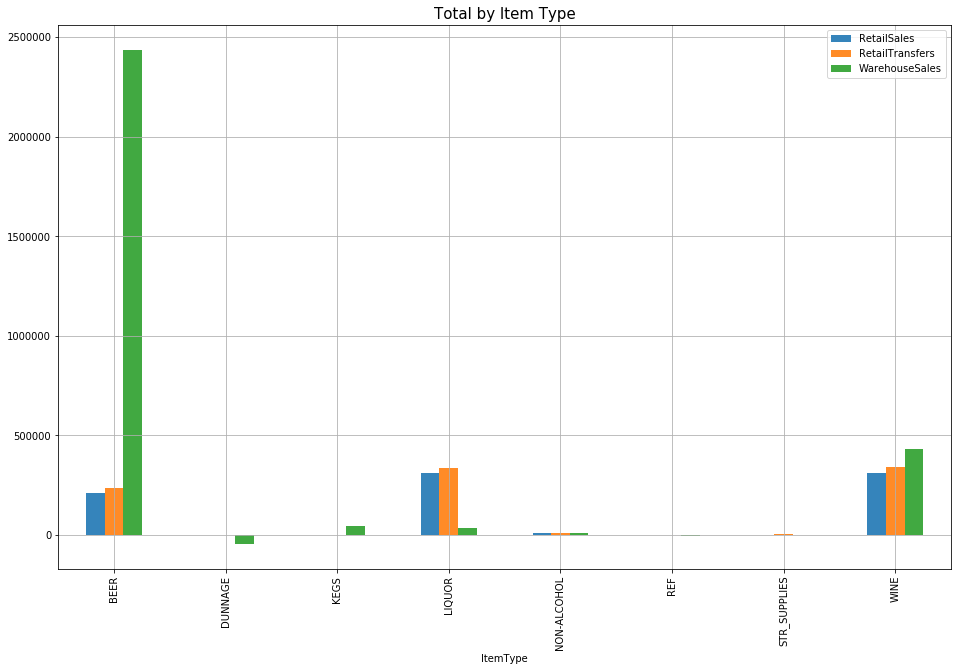

In [4]:
data2.plot(kind='bar', figsize=(16,10), alpha=0.9, grid=True)
plt.title('Total by Item Type',size=15)

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [5]:
dframe = data[['RetailSales','RetailTransfers','WarehouseSales']].groupby(data['Supplier']).sum()
dframe['TotalSales'] = dframe['RetailSales'] + dframe['RetailTransfers'] + dframe['WarehouseSales']
dframe = dframe.sort_values('TotalSales', ascending=False).head(10)
dframe.head(10)

,RetailSales,RetailTransfers,WarehouseSales,TotalSales
Supplier,,,,
MILLER BREWING COMPANY,35022.63,39176.67,572623.41,646822.71
CROWN IMPORTS,26707.83,29561.67,579824.70,636094.20
ANHEUSER BUSCH INC,42559.14,47322.64,493856.19,583737.97
HEINEKEN USA,20923.17,23004.25,318812.59,362740.01
E & J GALLO WINERY,67455.63,75129.83,75594.99,218180.45
DIAGEO NORTH AMERICA INC,57656.36,62968.12,54252.88,174877.36
CONSTELLATION BRANDS,54472.51,60542.10,44968.76,159983.37
JIM BEAM BRANDS CO,39156.79,43020.59,2928.45,85105.83
THE WINE GROUP,25758.15,28462.05,26603.78,80823.98


Text(0.5, 1.0, 'Sales mix for the TOP 10 Suppliers w/ most total sales')

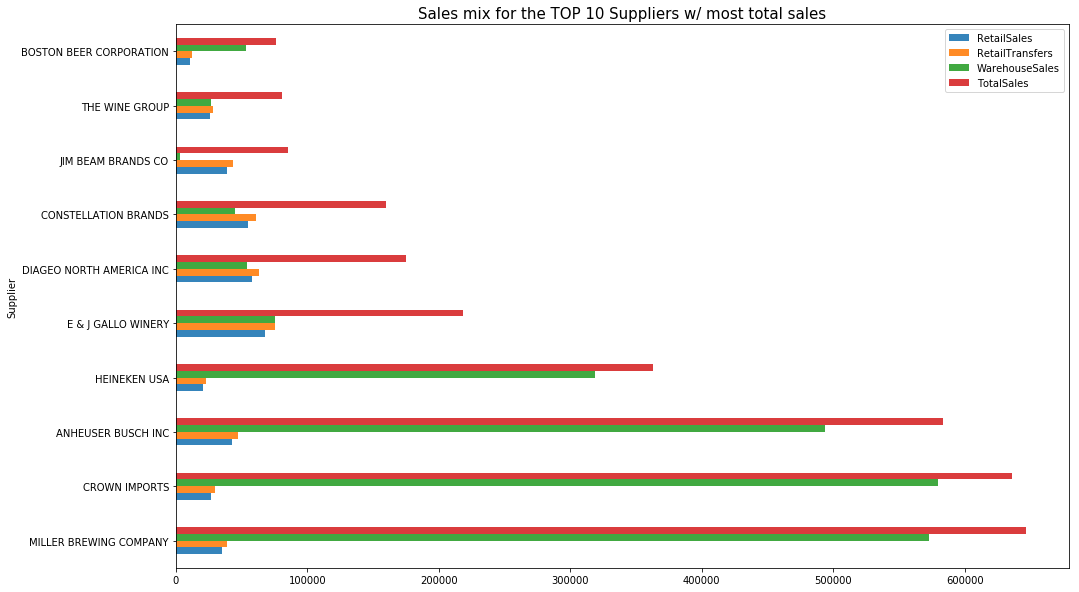

In [6]:
dframe.plot(kind='barh', figsize=(16,10), alpha=0.9)
plt.title('Sales mix for the TOP 10 Suppliers w/ most total sales',size=15)

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [7]:
df = data[['RetailSales','RetailTransfers','WarehouseSales']].groupby(data['Month']).mean()
df.head(10)

,RetailSales,RetailTransfers,WarehouseSales
Month,,,
1,5.679413,5.574833,19.072137
2,5.939247,6.050136,20.229658
4,0.000000,15.707503,0.000000
5,7.038838,7.421817,27.310548
6,7.143914,6.950396,27.839069
8,6.409991,6.584726,28.122641
9,6.757254,6.419721,22.817909
10,6.549021,6.827827,22.289367
11,6.765496,7.103699,23.348862


Text(0.5, 1.0, 'Averages / month over time')

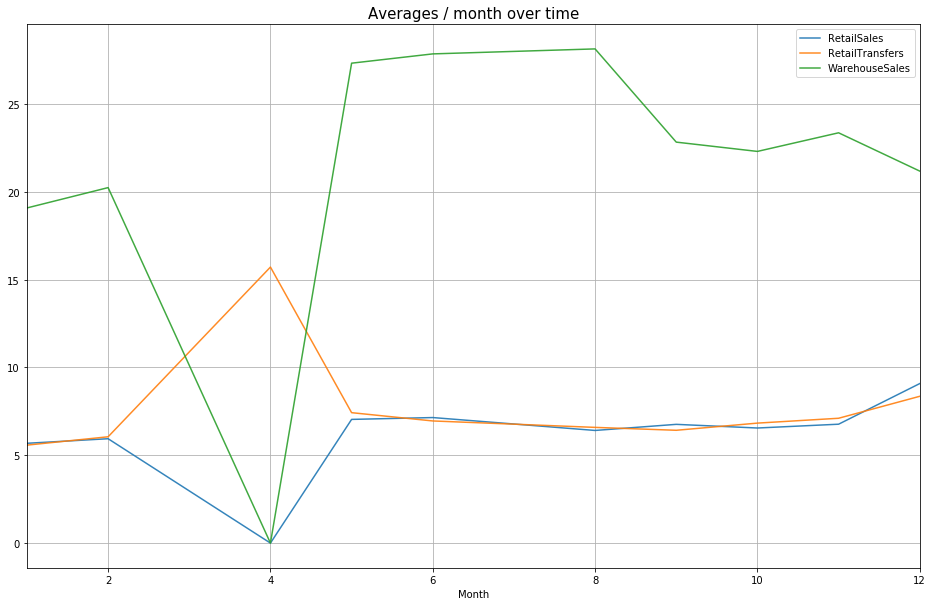

In [8]:
df.plot(kind='line', figsize=(16,10), alpha=0.9, grid=True)
plt.title('Averages / month over time',size=15)

## 4. Plot the same information as above but as a bar chart.

Text(0.5, 1.0, 'Averages / month over time')

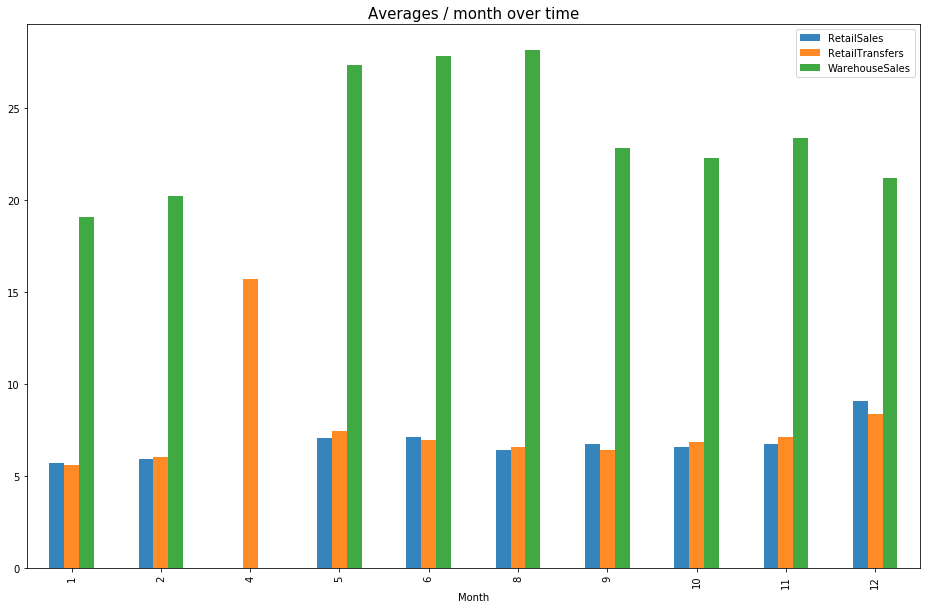

In [9]:
df.plot(kind='bar', figsize=(16,10), alpha=0.9)
plt.title('Averages / month over time',size=15)

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [10]:
df_frame = data[['Year','Month','RetailSales','ItemType']]
df_frame = pd.pivot_table(df_frame, values='RetailSales', index=['Year', 'Month'], columns=['ItemType'], aggfunc='sum')
df_frame.head(10)

ItemType        BEER  DUNNAGE  KEGS    LIQUOR  NON-ALCOHOL    REF  \
Year Month                                                          
2017 4          0.00      NaN   NaN      0.00         0.00   0.00   
     5      25023.24      NaN   NaN  35123.36          NaN    NaN   
     6      27863.26      0.0   0.0  35035.31      1209.23  30.60   
     8      23030.13      0.0   0.0  32186.04      1091.28  19.54   
     9      23852.76      0.0   0.0  32532.32       997.11  38.88   
     10     22583.78      0.0   0.0  32491.59       945.63  22.82   
     11     23341.14      0.0   0.0  35524.77      1005.19  63.11   
     12     28822.16      0.0   0.0  49522.28      1316.44  41.21   
2018 1      16606.33      0.0   0.0  28579.87       732.25  23.66   
     2      18640.31      0.0   0.0  28852.31       812.84  41.52   

ItemType    STR_SUPPLIES      WINE  
Year Month                          
2017 4              0.00      0.00  
     5               NaN  34546.89  
     6             89.22  33129.64  
     8             77.34  30707.45  
     9             94.64  32936.89  
     10            84.38  33108.76  
     11           106.06  38275.92  
     12           439.64  51492.76  
2018 1             56.94  29792.72  
     2             47.76  29409.39

Text(0.5, 1.0, 'Retail Sales summed by Item Type over time')

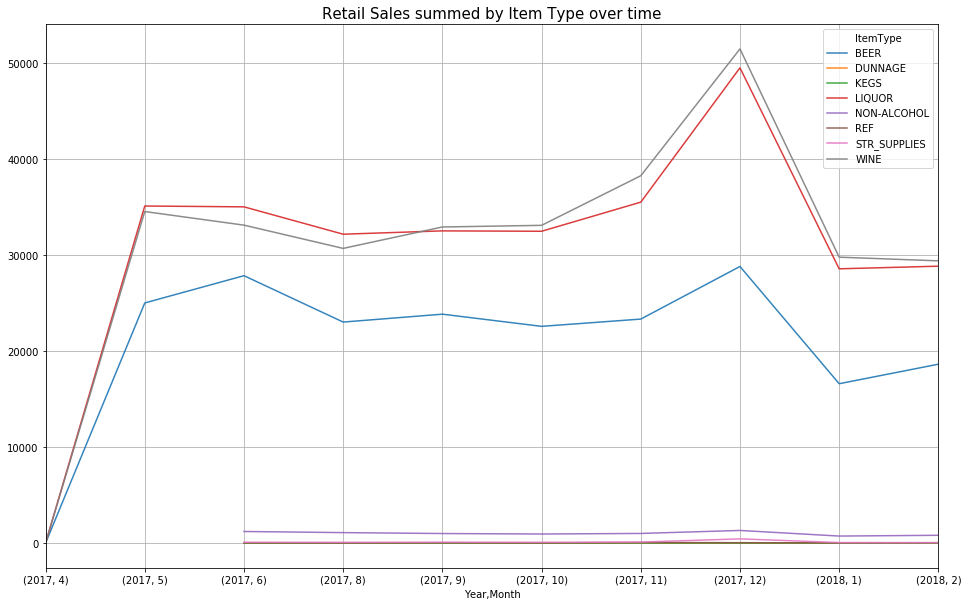

In [11]:
df_frame.plot(kind='line', figsize=(16,10), alpha=0.9, grid=True)
plt.title('Retail Sales summed by Item Type over time',size=15)

## 6. Plot the same information as above but as a bar chart.

Text(0.5, 1.0, 'Retail Sales summed by Item Type over time')

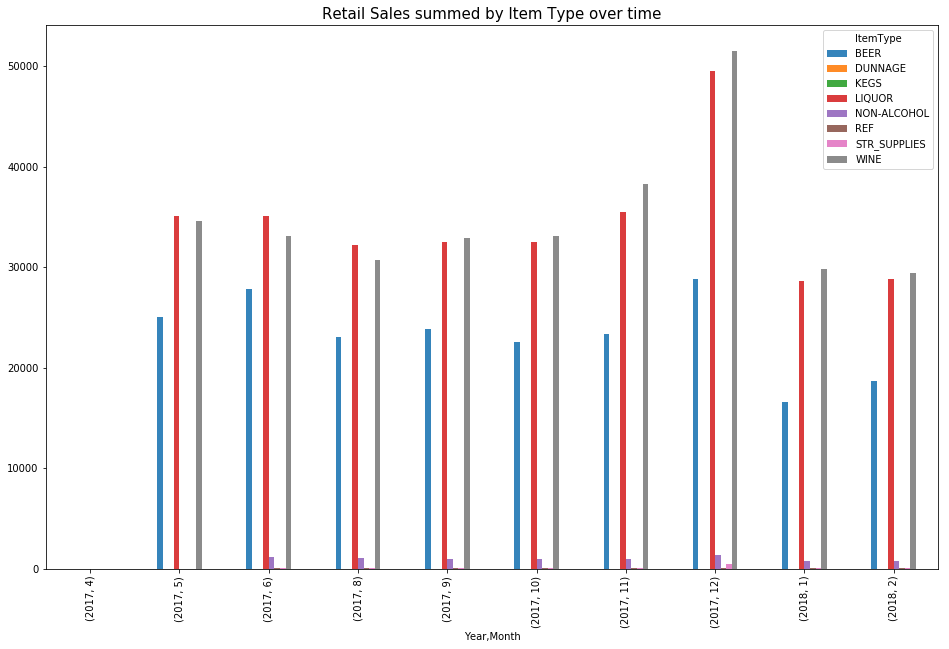

In [12]:
df_frame.plot(kind='bar', figsize=(16,10), alpha=0.9)
plt.title('Retail Sales summed by Item Type over time',size=15)

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

Text(0.5, 1.0, 'Relationship between Retail Sales & Retail Transfers')

<Figure size 432x288 with 0 Axes>

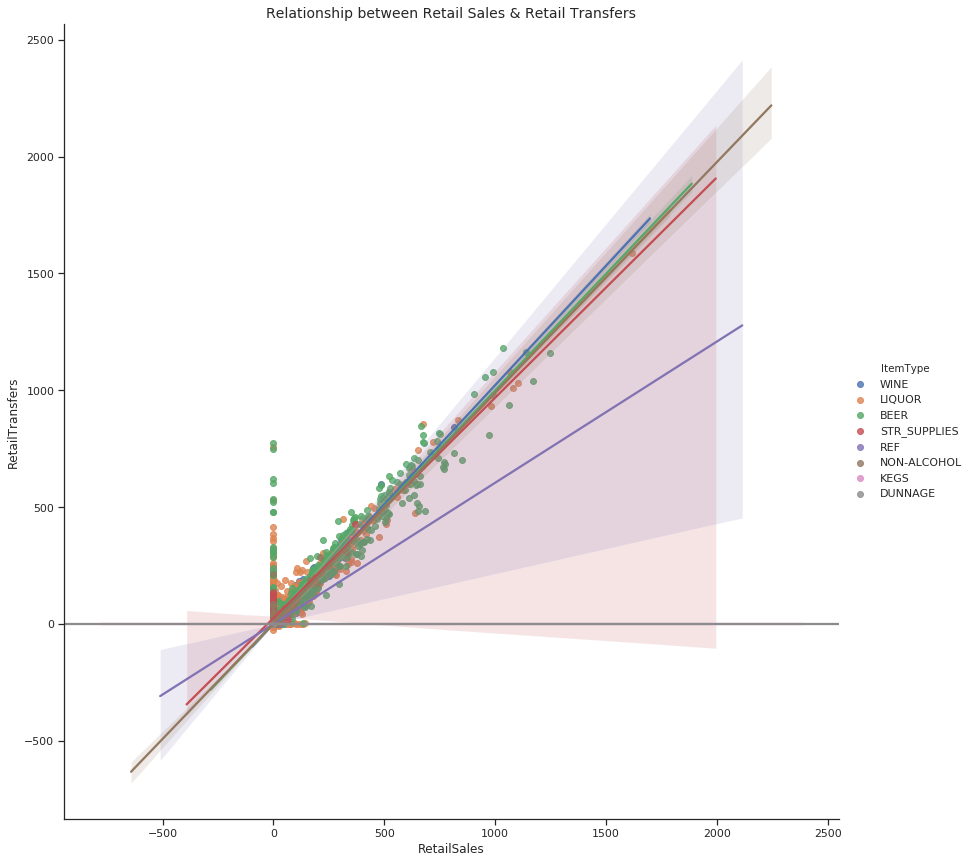

In [13]:
sns.set(style='ticks')
sns.despine()
sns.lmplot(x='RetailSales', y='RetailTransfers', data=data, hue='ItemType', height=12)
plt.title('Relationship between Retail Sales & Retail Transfers', size=14)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [14]:
#sns.pairplot(data, hue='ItemType')

---------------------------------------------------------------------------
LinAlgError                               Traceback (most recent call last)
<ipython-input-20-7dc160294725> in <module>
----> 1 sns.pairplot(data, hue='ItemType')

~/.local/lib/python3.6/site-packages/seaborn/axisgrid.py in pairplot(data, hue, hue_order, palette, vars, x_vars, y_vars, kind, diag_kind, markers, height, aspect, dropna, plot_kws, diag_kws, grid_kws, size)
   2109             diag_kws.setdefault("shade", True)
   2110             diag_kws["legend"] = False
-> 2111             grid.map_diag(kdeplot, **diag_kws)
   2112 
   2113     # Maybe plot on the off-diagonals

~/.local/lib/python3.6/site-packages/seaborn/axisgrid.py in map_diag(self, func, **kwargs)
   1397                     color = fixed_color
   1398 
-> 1399                 func(data_k, label=label_k, color=color, **kwargs)
   1400 
   1401             self._clean_axis(ax)

~/.local/lib/python3.6/site-packages/seaborn/distributions.py in kdeplot(data, data2, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, **kwargs)
    689         ax = _univariate_kdeplot(data, shade, vertical, kernel, bw,
    690                                  gridsize, cut, clip, legend, ax,
--> 691                                  cumulative=cumulative, **kwargs)
    692 
    693     return ax

~/.local/lib/python3.6/site-packages/seaborn/distributions.py in _univariate_kdeplot(data, shade, vertical, kernel, bw, gridsize, cut, clip, legend, ax, cumulative, **kwargs)
    292                               "only implemented in statsmodels."
    293                               "Please install statsmodels.")
--> 294         x, y = _scipy_univariate_kde(data, bw, gridsize, cut, clip)
    295 
    296     # Make sure the density is nonnegative

~/.local/lib/python3.6/site-packages/seaborn/distributions.py in _scipy_univariate_kde(data, bw, gridsize, cut, clip)
    364     """Compute a univariate kernel density estimate using scipy."""
    365     try:
--> 366         kde = stats.gaussian_kde(data, bw_method=bw)
    367     except TypeError:
    368         kde = stats.gaussian_kde(data)

~/.local/lib/python3.6/site-packages/scipy/stats/kde.py in __init__(self, dataset, bw_method, weights)
    206             self._neff = 1/sum(self._weights**2)
    207 
--> 208         self.set_bandwidth(bw_method=bw_method)
    209 
    210     def evaluate(self, points):

~/.local/lib/python3.6/site-packages/scipy/stats/kde.py in set_bandwidth(self, bw_method)
    538             raise ValueError(msg)
    539 
--> 540         self._compute_covariance()
    541 
    542     def _compute_covariance(self):

~/.local/lib/python3.6/site-packages/scipy/stats/kde.py in _compute_covariance(self)
    550                                                bias=False,
    551                                                aweights=self.weights))
--> 552             self._data_inv_cov = linalg.inv(self._data_covariance)
    553 
    554         self.covariance = self._data_covariance * self.factor**2

~/.local/lib/python3.6/site-packages/scipy/linalg/basic.py in inv(a, overwrite_a, check_finite)
    972         inv_a, info = getri(lu, piv, lwork=lwork, overwrite_lu=1)
    973     if info > 0:
--> 974         raise LinAlgError("singular matrix")
    975     if info < 0:
    976         raise ValueError('illegal value in %d-th argument of internal '

LinAlgError: singular matrix



**Me sale este error y hablando con algunos compañeros haciendo el mismo código a ellos les sale por lo que no entiendo qué tengo mal para que me salga el error. 
Si lo hago sin el *hue* me sale la gráfica.**

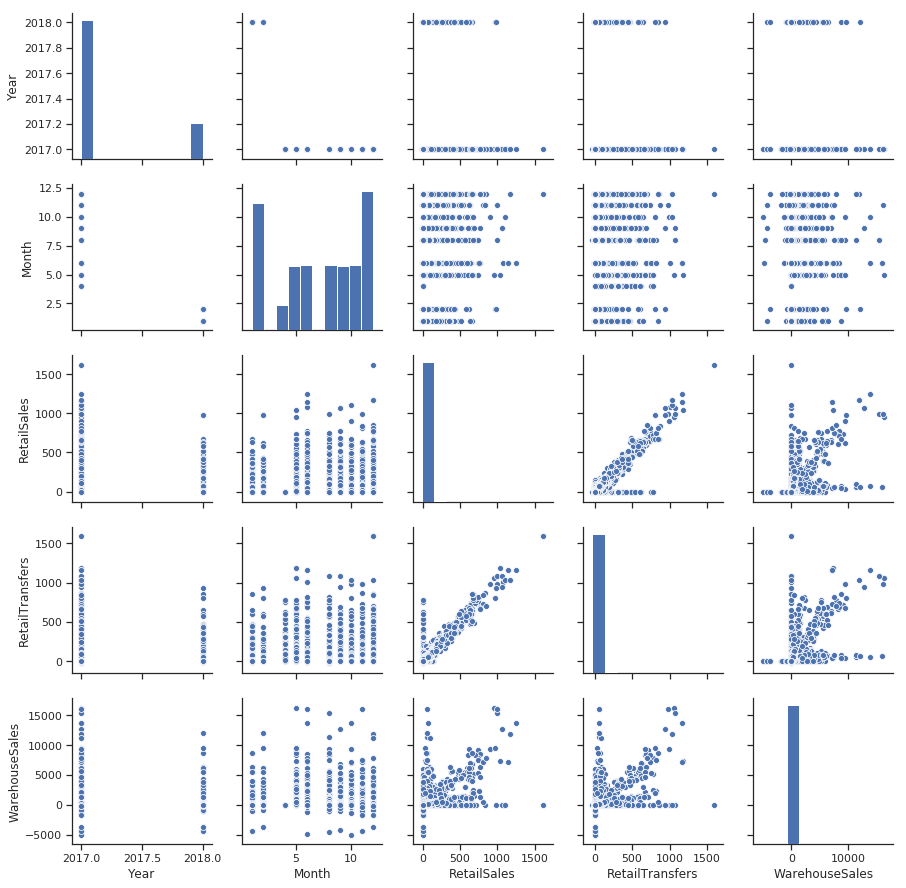

In [15]:
sns.set(style='ticks')
sns.pairplot(data)